In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [30]:
# Load the dataset
data = pd.read_csv('IRIS.csv') 

# Display basic information about the dataset
print(data.head())
# print(data.info())
print(data['species'].value_counts())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [4]:

# Encoding the categorical target variable
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


In [5]:
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize and train the K-Nearest Neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", class_report)


Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



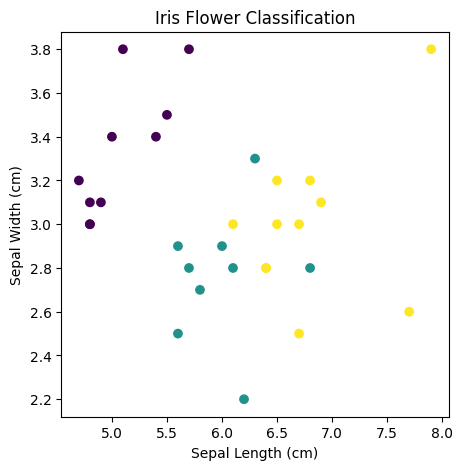

In [25]:
# Visualize the decision boundaries for two features (sepal length and sepal width)
plt.figure(figsize=(5, 5))
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Flower Classification')
plt.show()


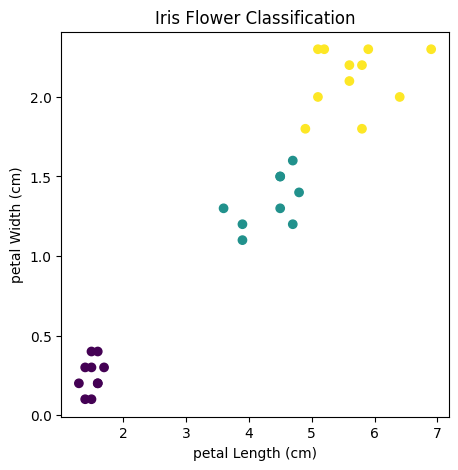

In [26]:
# Visualize the decision boundaries for two features (sepal length and sepal width)
plt.figure(figsize=(5, 5))
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_test)
plt.xlabel('petal Length (cm)')
plt.ylabel('petal Width (cm)')
plt.title('Iris Flower Classification')
plt.show()
